EMBED [1, 1, 1, 2, 2, 2]
EMBED [1, 1, 1, 2, 2, 2]
EMBED [1, 1, 1, 2, 2, 2]
E0=-4161.524011
{(1, 1, 1): array([[ 2.00304768e+00,  1.07756487e-03,  1.77698919e-02, ...,
         1.02154494e-05, -2.50984634e-04, -2.45833403e-16],
       [ 1.07756487e-03,  9.60836566e-02, -3.58884689e-01, ...,
         2.91090792e-04, -3.82409593e-03,  3.41192794e-17],
       [ 1.77698919e-02, -3.58884689e-01,  1.50657167e+00, ...,
        -8.23476447e-04,  1.14947429e-02, -1.23055658e-16],
       ...,
       [ 1.02154494e-05,  2.91090792e-04, -8.23476447e-04, ...,
         3.46837493e-06, -2.16312627e-05,  4.59850263e-18],
       [-2.50984634e-04, -3.82409593e-03,  1.14947429e-02, ...,
        -2.16312627e-05,  2.13580802e-04, -5.20257960e-18],
       [-2.45833403e-16,  3.41192794e-17, -1.23055658e-16, ...,
         4.59850263e-18, -5.20257960e-18,  1.38372214e-05]]), (2, 1, 1): array([[ 2.00735240e-04,  8.08847416e-04, -1.84736637e-03, ...,
        -4.14429624e-04,  1.70354663e-04,  3.28613575e-18],
    

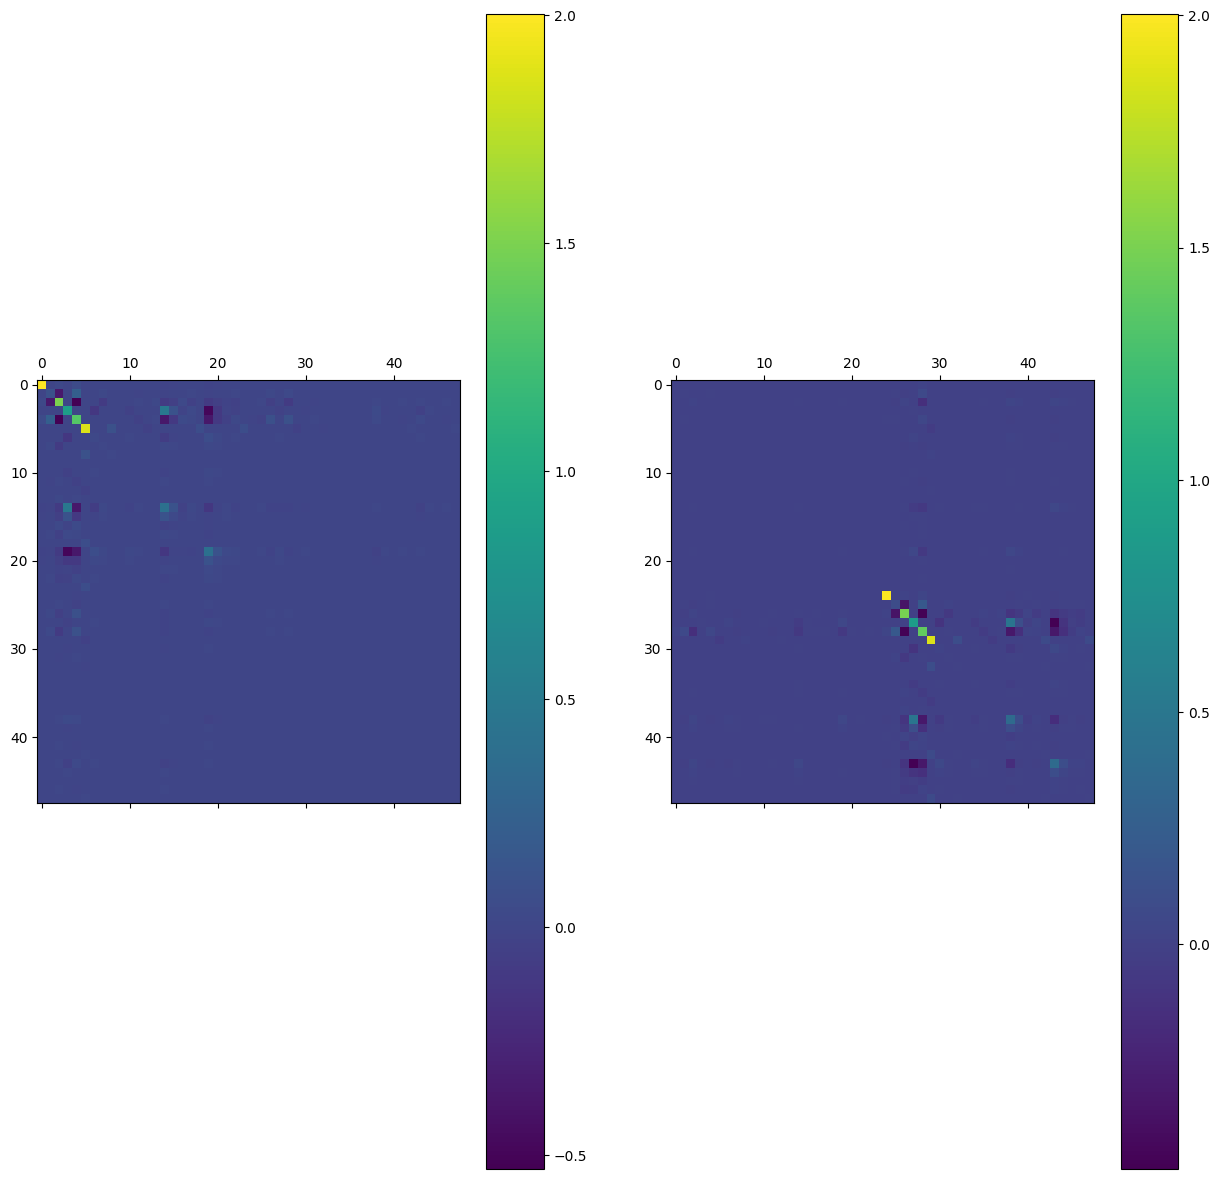

In [7]:
import os
from asi_embedding.asi_embedding.embedding import ProjectionEmbedding
from ase.calculators.aims import Aims
from ase.build import molecule

os.environ['ASI_LIB_PATH'] = "/home/gabriellbramley/FHIaims_GAB/builds/mkl_scalapack_oneapi_embedding/libaims.240206.scalapack.mpi.so"
H2O_1 = molecule("H2O")
H2O_2 = molecule("H2O")
H2O_2.translate((0,0,2.5))
H2O_1 += H2O_2

calc = Aims(xc='PBE',
    occupation_type="gaussian 0.01",
    mixer="pulay",
    n_max_pulay=10,
    charge_mix_param=0.5,
    sc_accuracy_rho=1E-05,
    sc_accuracy_eev=1E-03,
    sc_accuracy_etot=1E-06,
#    sc_accuracy_forces=1E-04,
    sc_iter_limit=100,
    collect_eigenvectors=True,
#    compute_forces=True,
    postprocess_anyway = True,
    density_update_method='density_matrix', # for DM export
  )

Projection = ProjectionEmbedding(H2O_1, embed_mask=3, calc_base=calc, scf_methods=["pbe","rpbe"], mu_val=3.e+6)

Projection.AB_LL.run()
print(Projection.AB_LL.atoms.calc.asi.dm_storage) 
#print(Projection.AB_LL.atoms.calc.asi.dm_storage.get((1,1,1), None))
Projection.A_LL.run(load_dm=Projection.AB_LL.atoms.calc.asi.dm_storage.get((1, 1), None))

import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(15, 15))
ax1 = axs[0]
ax2 = axs[1]
cax1 = ax1.matshow(Projection.AB_LL.atoms.calc.asi.dm_storage.get((1,1,1), None))
cax2 = ax2.matshow(Projection.AB_LL.atoms.calc.asi.dm_storage.get((2,1,1), None))
fig.colorbar(cax1)
fig.colorbar(cax2)


plt.show()


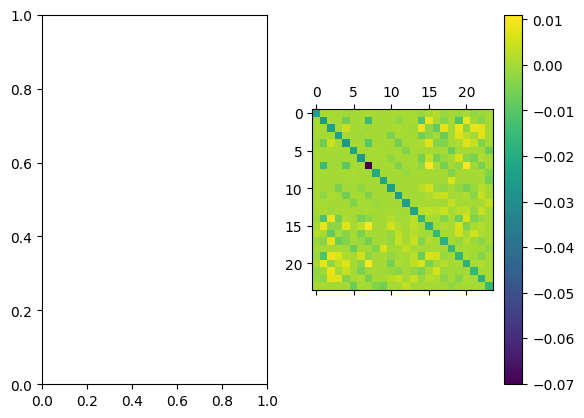

In [2]:
fig, axs = plt.subplots(1, 2)
ax1 = axs[0]
ax2 = axs[1]

cax3 = ax2.matshow(Projection.AB_LL.atoms.calc.asi.hamiltonian_storage.get((1,1))[:24,:24]-Projection.A_LL.atoms.calc.asi.hamiltonian_storage.get((1,1))[:24,:24])
fig.colorbar(cax3)

plt.show()


In [25]:
def create_var_dict(*args):
    

    return output_dict.__dict__

class OutputDict(object): pass
output_dict = OutputDict()
outputs = ['a','b','c']

for var in outputs:
    setattr(output_dict, var, eval(var))

print(output_dict.__dict__)

{'a': 1, 'b': 2, 'c': 3}
